In [ ]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import spacy
import matplotlib.pyplot as plt
import seaborn as sns #visualization
from sklearn.model_selection import GridSearchCV #cross validation
from wordcloud import WordCloud
from PIL import Image
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [ ]:
#https://dataverse.cirad.fr/dataset.xhtml?persistentId=doi:10.18167/DVN1/MSLEFC

In [ ]:
#data = pd.read_csv('lest_republicain_clean.csv')

In [ ]:
#removing irrelevant columns
data_short = pd.read_csv('/content/preprocessed_data.csv')

In [ ]:
data_short.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data_short.head()

,clean_text,relevance
0,heure patient hospitaliser nouveau décès indic...,0.0
1,jeudi octobre patient hospitaliser grand rappo...,1.0
2,régulateur européen avoir indiquer jeudi avoir...,0.0
3,membre proposer oms faire partie groupe consul...,0.0
4,personne recevoir vaccin contre covid johnson ...,0.0


In [ ]:
data_short['relevance'].value_counts(normalize=True)

1.0    0.656986
0.0    0.343014
Name: relevance, dtype: float64

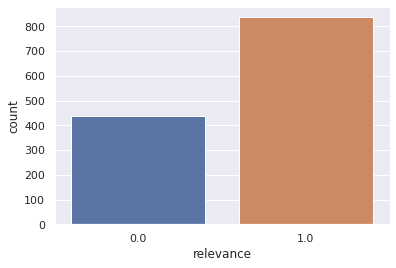

In [ ]:
sns.set_theme()
sns.countplot(x='relevance',data=data_short);

In [ ]:
exclure_mots = ['d', 'du', 'de', 'la', 'des', 'le', 'et', 'est', 'elle', 'une',
                'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 
                'ou', 'à', 'ce', 'a', 'sont', 'cas',
                'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi', 'toutes', 'autre', 'comme']

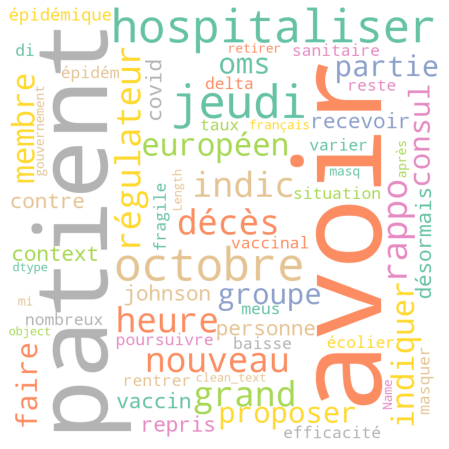

In [ ]:
plt.figure(figsize=(8,8))
word_cloud = WordCloud(width = 800, height = 800,
                max_words=1000,
                background_color ='white',
                stopwords = exclure_mots,
                min_font_size = 12,colormap="Set2").generate(str(data_short['clean_text']))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [ ]:
vectorizer = CountVectorizer(max_features=1000)
topic = vectorizer.fit_transform(data_short["clean_text"]).toarray()
df_title = pd.DataFrame(topic, columns=vectorizer.get_feature_names_out())
df_title = pd.DataFrame(df_title.sum(), columns=["Value"])
df_title.head()

,Value
accord,140
accueillir,229
accès,211
accéder,123
accélérer,103


In [ ]:
top20 = df_title.sort_values("Value", ascending=False)[:20]

In [ ]:
top20

,Value
avoir,14886
plus,7480
heure,7362
covid,5691
sanitaire,4488
vaccin,4214
personne,3908
vaccination,3740
contre,3510
faire,3436


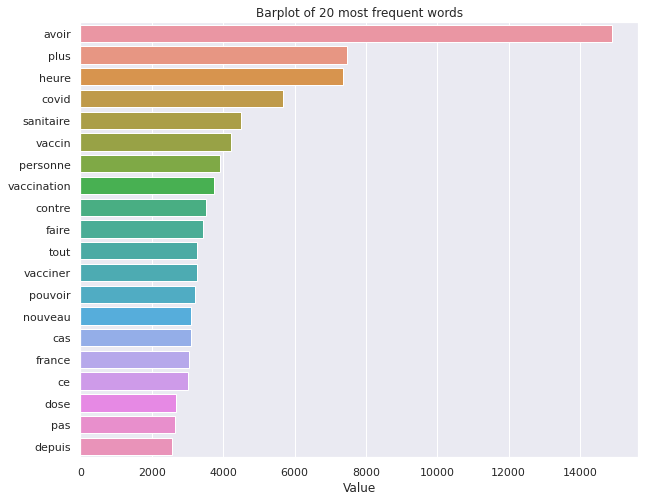

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=top20.Value,y=top20.index,data=top20)
plt.title('Barplot of 20 most frequent words')
plt.show()

In [ ]:
df_X, df_y = data_short['clean_text'], data_short['relevance'] 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=0)

In [ ]:
x_train

1037    grand oublier différent déconfinement boîte nu...
528     voici petit mémento savoir où pass demander lu...
1084    france métropolitain où nombreux français prof...
751     heure allemagn lever interdiction entrer royau...
402     scandale allemagn infirmier avoir injecter eau...
                              ...                        
763     depuis début pandémie mars plusieurs pays voir...
835     comme semaine dernier selon rectorat besançon ...
1216    appeler ay nouveau sous varier très contagieux...
559     préfecture alpe maritime avoir annoncer dimanc...
684     pas sanitaire obligatoire tout plus an partir ...
Name: clean_text, Length: 891, dtype: object

In [ ]:
tf_idf = Pipeline([('cv',CountVectorizer()), ('tfidf_transformer',TfidfTransformer(smooth_idf=True,use_idf=True))])


x_train_CV  = tf_idf.fit_transform(x_train)
x_test_CV = tf_idf.transform(x_test)

In [ ]:
mnb = MultinomialNB()
y_train=y_train.astype('int')
y_train

363    0
440    1
669    1
263    0
17     0
      ..
835    1
192    0
629    1
559    1
684    1
Name: relevance, Length: 598, dtype: int64

In [ ]:
confusion_matrix(predictions, y_test)

array([[133,  75],
       [  3,  46]])

In [ ]:
mnb.fit(x_train_CV,y_train)

MultinomialNB()

In [ ]:
predictions = mnb.predict(x_test_CV)

In [ ]:
print("Precision:",metrics.precision_score(y_test, predictions))

Precision: 0.9387755102040817


In [ ]:
y_train

238     0
115     1
333     0
901     1
34      1
       ..
360     1
709     1
439     1
174     1
1146    1
Name: relevance, Length: 1019, dtype: int64

In [ ]:
scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',
                                    random_state=0, C=1.0, penalty='l2',class_weight = "balanced")
model=scikit_log_reg.fit(x_train_CV,y_train)

[LibLinear]

In [ ]:
y_pred = model.predict(x_test_CV)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.77      0.76       128
         1.0       0.88      0.88      0.88       255

    accuracy                           0.84       383
   macro avg       0.82      0.82      0.82       383
weighted avg       0.84      0.84      0.84       383



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 98  30]
 [ 31 224]]


In [ ]:
clf = svm.SVC()

In [ ]:
model2 = clf.fit(x_train_CV,y_train)

In [ ]:
y_pred2 = model2.predict(x_test_CV)

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.83      0.68      0.75       128
         1.0       0.85      0.93      0.89       255

    accuracy                           0.85       383
   macro avg       0.84      0.80      0.82       383
weighted avg       0.84      0.85      0.84       383



Cross validation

In [ ]:
grid_p = {'C' : [1e-2,0.05,0.1,0.5],'kernel': ['linear','rbf'] }
grid = GridSearchCV(clf,param_grid=grid_p,scoring='accuracy',cv=4)

In [ ]:
grid_cv=grid.fit(x_train_CV,y_train)

In [ ]:
grid_cv.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [ ]:
clf = svm.SVC(C=0.5,kernel='linear')

In [ ]:
model2 = clf.fit(x_train_CV,y_train)

In [ ]:
y_pred2 = model2.predict(x_test_CV)
print(classification_report(y_test,y_pred2))


              precision    recall  f1-score   support

         0.0       0.82      0.71      0.76       128
         1.0       0.86      0.92      0.89       255

    accuracy                           0.85       383
   macro avg       0.84      0.82      0.83       383
weighted avg       0.85      0.85      0.85       383



In [ ]:
print(confusion_matrix(y_test,y_pred2))

[[ 91  37]
 [ 20 235]]


In [ ]:
grid_l = {'C' : [100,150,200]}
grid = GridSearchCV(scikit_log_reg,param_grid=grid_l,scoring='accuracy',cv=4)

In [ ]:
grid_cv = grid.fit(x_train_CV,y_train)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

In [ ]:
grid_cv.best_params_

{'C': 100}

In [ ]:
scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',
                                    random_state=0, C=100, penalty='l2',class_weight = "balanced")
model=scikit_log_reg.fit(x_train_CV,y_train)

[LibLinear]

In [ ]:
y_pred = model.predict(x_test_CV)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81       128
         1.0       0.89      0.92      0.91       255

    accuracy                           0.87       383
   macro avg       0.86      0.85      0.86       383
weighted avg       0.87      0.87      0.87       383

